# Using Deepchem Datasets
In this tutorial we will have a look at various deepchem `dataset` methods present in `deepchem.datasets`.

In [1]:
import deepchem as dc
import numpy as np
import random


/home/skand/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Using NumpyDatasets 
This is used when you have your data in numpy arrays.

In [2]:
# data is your dataset in numpy array of size : 20x20.
data = np.random.random((4, 4))
labels = np.random.random((4,)) # labels of size 20x1


In [3]:
from deepchem.data.datasets import NumpyDataset # import NumpyDataset

In [4]:
dataset = NumpyDataset(data, labels) # creates numpy dataset object

## Extracting X, y from NumpyDataset Object
Extracting the data and labels from the NumpyDataset is very easy. 

In [5]:
dataset.X # Extracts the data (X) from the NumpyDataset Object


array([[0.63188616, 0.24690483, 0.85294168, 0.15512774],
       [0.62009111, 0.00525149, 0.56082693, 0.0649767 ],
       [0.57476389, 0.92047762, 0.36311505, 0.53421993],
       [0.5768823 , 0.51945064, 0.9655427 , 0.82099216]])

In [6]:
dataset.y # Extracts the labels (y) from the NumpyDataset Object

array([[0.5102078 ],
       [0.76199464],
       [0.77398379],
       [0.09498917]])

## Weights of a dataset - w
So apart from `X` and `y` which are the data and the labels, you can also assign weights `w` to each data instance. The dimension of `w` is same as that of `y`(which is Nx1 where N is the number of data instances).

**NOTE:** By default `w` is a vector initialized with equal weights (all being 1). 

In [7]:
dataset.w # printing the weights that are assigned by default. Notice that they are a vector of 1's

array([[1.],
       [1.],
       [1.],
       [1.]])

In [8]:
w = np.random.random((4,)) # initializing weights with random vector of size 20x1
dataset_with_weights = NumpyDataset(data, labels, w) # creates numpy dataset object

In [9]:
dataset_with_weights.w

array([[0.85432113],
       [0.91847254],
       [0.59774769],
       [0.36659207]])

## Iterating over NumpyDataset
In order to iterate over NumpyDataset, we use `itersamples` method. We iterate over 4 quantities, namely `X`, `y`, `w` and `ids`. The first three quantities are the same as discussed above and `ids` is the id of the data instance. By default the id is given in order starting from `1`

In [10]:
for x, y, w, id in dataset.itersamples():
    print(x, y, w, id)

(array([0.63188616, 0.24690483, 0.85294168, 0.15512774]), array([0.5102078]), array([1.]), 0)
(array([0.62009111, 0.00525149, 0.56082693, 0.0649767 ]), array([0.76199464]), array([1.]), 1)
(array([0.57476389, 0.92047762, 0.36311505, 0.53421993]), array([0.77398379]), array([1.]), 2)
(array([0.5768823 , 0.51945064, 0.9655427 , 0.82099216]), array([0.09498917]), array([1.]), 3)


You can also extract the ids by `dataset.ids`. This would return a numpy array consisting of the ids of the data instances.

In [11]:
dataset.ids

array([0, 1, 2, 3], dtype=object)

## MNIST Example
Just to get a better understanding, lets take read MNIST data and use `NumpyDataset` to store the data. 

In [12]:
from tensorflow.examples.tutorials.mnist import input_data

In [13]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [14]:
# Load the numpy data of MNIST into NumpyDataset
train = NumpyDataset(mnist.train.images, mnist.train.labels)
valid = NumpyDataset(mnist.validation.images, mnist.validation.labels)


In [15]:
import matplotlib.pyplot as plt

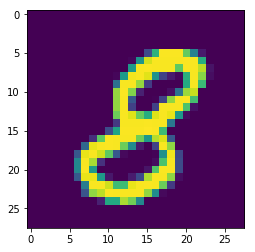

In [16]:
# Visualize one sample 
sample = np.reshape(train.X[5], (28, 28))
plt.imshow(sample)
plt.show()

## Numpy Array to tf.data.dataset()
This is quite similar to getting a `NumpyDataset` object from numpy arrays.

In [19]:
import tensorflow as tf
data_small = np.random.random((4,5))
label_small = np.random.random((4,))
dataset = tf.data.Dataset.from_tensor_slices((data_small, label_small))
print ("Data\n")
print (data_small)
print ("\n Labels")
print (label_small)

Data

[[0.78574579 0.79398959 0.64737371 0.20447343 0.55009141]
 [0.39201333 0.12299678 0.69700424 0.57494847 0.59895521]
 [0.711899   0.22786574 0.6436164  0.49713391 0.31487844]
 [0.95354154 0.67493395 0.84554228 0.15894518 0.0154379 ]]

 Labels
[0.61605796 0.07695742 0.1084755  0.30322915]


## Extracting the numpy dataset from tf.data
In order to extract the numpy array from the `tf.data`, you first need to define an `iterator` to iterate over the `tf.data.Dataset` object and then in the tensorflow session, run over the iterator to get the data instances. Let's have a look at how it's done.

In [41]:
iterator = dataset.make_one_shot_iterator() # iterator
next_element = iterator.get_next()
numpy_data = np.zeros((4, 5))
numpy_label = np.zeros((4,))
sess = tf.Session() # tensorflow session 
for i in range(4):
    data_, label_ = sess.run(next_element) # data_ contains the data and label_ contains the labels that we fed in the previous step
    numpy_data[i, :] = data_
    numpy_label[i] = label_
    
print ("Numpy Data")
print(numpy_data)
print ("\n Numpy Label")
print(numpy_label)

Numpy Data
[[0.78574579 0.79398959 0.64737371 0.20447343 0.55009141]
 [0.39201333 0.12299678 0.69700424 0.57494847 0.59895521]
 [0.711899   0.22786574 0.6436164  0.49713391 0.31487844]
 [0.95354154 0.67493395 0.84554228 0.15894518 0.0154379 ]]

 Numpy Label
[0.61605796 0.07695742 0.1084755  0.30322915]


Now that you have the numpy arrays of `data` and `labels`, you can convert it to `NumpyDataset`.

In [52]:
dataset_ = NumpyDataset(numpy_data, numpy_label) # convert to NumpyDataset
dataset_.X  # printing just to check if the data is same!!

array([[0.78574579, 0.79398959, 0.64737371, 0.20447343, 0.55009141],
       [0.39201333, 0.12299678, 0.69700424, 0.57494847, 0.59895521],
       [0.711899  , 0.22786574, 0.6436164 , 0.49713391, 0.31487844],
       [0.95354154, 0.67493395, 0.84554228, 0.15894518, 0.0154379 ]])

## Converting NumpyDataset to `tf.data`
This can be easily done by the `make_iterator()` method of `NumpyDataset`. This converts the `NumpyDataset` to `tf.data`. Let's look how it's done!

In [53]:
iterator_ = dataset_.make_iterator() # Using make_iterator for converting NumpyDataset to tf.data
next_element_ = iterator_.get_next()

sess = tf.Session() # tensorflow session 
data_and_labels = sess.run(next_element_) # data_ contains the data and label_ contains the labels that we fed in the previous step


print ("Numpy Data")
print(data_and_labels[0])  # Data in the first index 
print ("\n Numpy Label")
print(data_and_labels[1])  # Labels in the second index

Numpy Data
[[0.78574579 0.79398959 0.64737371 0.20447343 0.55009141]
 [0.95354154 0.67493395 0.84554228 0.15894518 0.0154379 ]
 [0.711899   0.22786574 0.6436164  0.49713391 0.31487844]
 [0.39201333 0.12299678 0.69700424 0.57494847 0.59895521]]

 Numpy Label
[[0.61605796]
 [0.30322915]
 [0.1084755 ]
 [0.07695742]]
